In [11]:
#data manipulation
import pandas as pd
import numpy as np
import os

# data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
from IPython.display import Image

# model fit
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from datetime import datetime
from datetime import timedelta

from tensorflow import keras
from tensorflow.keras import layers


# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

# set the max columns to none
pd.set_option('display.max_columns', None)

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [13]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
if os.path.isdir("dataset") == False:
    !kaggle competitions download -c g-research-crypto-forecasting

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
crypto_df = pd.read_csv('train.csv')
crypto_df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [16]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
crypto_df.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,24236806.0000,24236806.0000,24236806.0000,24236806.0000,24236806.0000,24236806.0000,24236806.0000,24236806.0000,24236797.0000,23486468.0000
mean,1577120425.3125,6.2925,286.4593,1432.6405,1436.3504,1429.5676,1432.6400,286852.9856,NaN,0.0000
std,33233501.7421,4.0919,867.3982,6029.6050,6039.4824,6020.2607,6029.6106,2433934.6459,NaN,0.0057
min,1514764860.0000,0.0000,1.0000,0.0012,0.0012,0.0002,0.0012,-0.3663,-inf,-0.5094
25%,1549011480.0000,3.0000,19.0000,0.2676,0.2682,0.2669,0.2676,141.0725,0.2676,-0.0017
50%,1578371880.0000,6.0000,64.0000,14.2886,14.3125,14.2630,14.2892,1295.4146,14.2877,-0.0000
75%,1606197540.0000,9.0000,221.0000,228.8743,229.3000,228.4200,228.8729,27297.6401,228.8728,0.0016
max,1632182400.0000,13.0000,165016.0000,64805.9438,64900.0000,64670.5300,64808.5373,759755403.1424,inf,0.9642


In [17]:
asset_details = pd.read_csv("asset_details.csv")
asset_details = asset_details.sort_values("Asset_ID")
asset_details = asset_details.reset_index(drop = True)
asset_details

,Asset_ID,Weight,Asset_Name
0,0,4.3041,Binance Coin
1,1,6.7799,Bitcoin
2,2,2.3979,Bitcoin Cash
3,3,4.4067,Cardano
4,4,3.5553,Dogecoin
5,5,1.3863,EOS.IO
6,6,5.8944,Ethereum
7,7,2.0794,Ethereum Classic
8,8,1.0986,IOTA
9,9,2.3979,Litecoin


## Remove NaN and INF

In [18]:
# Replace infinite updated data with nan
crypto_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows with NaN
crypto_df.dropna(inplace=True)

# drop rows with negative volume 
crypto_df=crypto_df[crypto_df.Volume>0]

# reset index
crypto_df.reset_index(
    drop=True,
    inplace=True
)


In [19]:
# look at summary again
crypto_df.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000
mean,1577541313.6106,6.2243,295.4029,1476.0508,1479.8768,1472.8822,1476.0503,294731.7511,1476.0387,0.0000
std,33333675.5777,4.0995,879.6245,6119.9517,6129.9670,6110.4736,6119.9574,2471421.1639,6119.9040,0.0057
min,1514764860.0000,0.0000,1.0000,0.0012,0.0012,0.0002,0.0012,0.0000,-799.7471,-0.5094
25%,1549306260.0000,3.0000,22.0000,0.2809,0.2819,0.2800,0.2809,149.3899,0.2809,-0.0017
50%,1578971040.0000,6.0000,69.0000,14.8684,14.8900,14.8440,14.8686,1332.3629,14.8672,-0.0000
75%,1606979460.0000,9.0000,231.0000,234.9650,235.3800,234.5200,234.9686,29115.1704,234.9650,0.0016
max,1632181440.0000,13.0000,165016.0000,64805.9438,64900.0000,64670.5300,64808.5373,759755403.1424,64799.8222,0.9642


In [20]:
crypto_df.shape

(23486457, 10)

In [21]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486457 entries, 0 to 23486456
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   Asset_ID   int64  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
dtypes: float64(8), int64(2)
memory usage: 1.7 GB


## Add real asset name and convert Timestamp

In [22]:
def crypto_df_maker(my_df, asset_id=-1):
    '''
    This will subset the original data frame to only show one type of cryptocurrency
    asset_id: Type of crypto currency id from the asset_details table
    If asset_is==-1, it includes all crypto currencies
    '''
    
    if (asset_id == -1):
        df = my_df
    else:
        df = my_df[my_df['Asset_ID'] == asset_id] #based on asset_id filter crypto_df
        df = df.reset_index(drop = True)
    
    df['timestamp'] =  pd.to_datetime(df['timestamp'], unit='s') #change timestamp to a date + time
    df = pd.merge(df, asset_details[["Asset_ID", "Asset_Name"]], on="Asset_ID", how="left") #add the name to the df
    
    temp_cols=df.columns.tolist() #move asset_name to the 2 index
    new_cols= temp_cols[:2] + temp_cols[-1:] + temp_cols[2:-1]
    df=df[new_cols]
    
    return df

In [23]:
#crypto_df = crypto_df_maker(crypto_df, asset_id=1)
crypto_df = crypto_df_maker(crypto_df)
crypto_df.head()

,timestamp,Asset_ID,Asset_Name,Count,Open,High,Low,Close,Volume,VWAP,Target
0,2018-01-01 00:01:00,2,Bitcoin Cash,40.0000,2376.5800,2399.5000,2357.1400,2374.5900,19.2330,2373.1164,-0.0042
1,2018-01-01 00:01:00,0,Binance Coin,5.0000,8.5300,8.5300,8.5300,8.5300,78.3800,8.5300,-0.0144
2,2018-01-01 00:01:00,1,Bitcoin,229.0000,13835.1940,14013.8000,13666.1100,13850.1760,31.5501,13827.0621,-0.0146
3,2018-01-01 00:01:00,5,EOS.IO,32.0000,7.6596,7.6596,7.6567,7.6576,6626.7134,7.6577,-0.0139
4,2018-01-01 00:01:00,7,Ethereum Classic,5.0000,25.9200,25.9200,25.8740,25.8770,121.0873,25.8914,-0.0083


## Shrink dataset to smaller size and we will shrink it further later because rolling window average will create some NaN on window boundary

In [24]:
crypto_df = crypto_df[(crypto_df['timestamp'] >= '2020-07-01') & (crypto_df['timestamp'] < '2021-09-01')]

In [25]:
crypto_df.shape

(8441214, 11)

## Sort dataset based on timestamp

In [26]:
crypto_df.sort_values(by=['timestamp'], inplace=True)

In [27]:
crypto_df.head(10)

,timestamp,Asset_ID,Asset_Name,Count,Open,High,Low,Close,Volume,VWAP,Target
14642422,2020-07-01 00:01:00,3,Cardano,56.0000,0.0831,0.0833,0.0829,0.0831,267613.8777,0.0831,-0.0010
14642433,2020-07-01 00:01:00,12,Stellar,20.0000,0.0669,0.0669,0.0668,0.0668,78429.6000,0.0668,0.0006
14642432,2020-07-01 00:01:00,13,TRON,135.0000,0.0164,0.0164,0.0163,0.0163,4751667.8209,0.0163,0.0025
14642431,2020-07-01 00:01:00,10,Maker,1.0000,457.2426,457.2426,457.2426,457.2426,0.2185,457.2426,0.0001
14642429,2020-07-01 00:01:00,8,IOTA,32.0000,0.2259,0.2265,0.2258,0.2260,7114.5823,0.2260,0.0025
14642428,2020-07-01 00:01:00,6,Ethereum,398.0000,225.3394,225.6763,224.9100,225.1300,1076.2080,225.2692,-0.0008
14642430,2020-07-01 00:01:00,9,Litecoin,130.0000,41.1442,41.1690,41.0700,41.1036,770.2987,41.1301,0.0002
14642426,2020-07-01 00:01:00,5,EOS.IO,188.0000,2.3655,2.3683,2.3624,2.3642,21415.8632,2.3651,0.0005
14642425,2020-07-01 00:01:00,1,Bitcoin,1603.0000,9129.7808,9147.6354,9116.0700,9121.6429,116.1433,9126.6759,0.0002
14642424,2020-07-01 00:01:00,0,Binance Coin,69.0000,15.3829,15.3883,15.3666,15.3673,1380.5500,15.3790,0.0015


In [28]:
crypto_df.tail(10)

,timestamp,Asset_ID,Asset_Name,Count,Open,High,Low,Close,Volume,VWAP,Target
23083629,2021-08-31 23:59:00,6,Ethereum,854.0000,3432.5283,3433.6000,3429.1500,3430.1833,365.9261,3432.1403,0.0034
23083628,2021-08-31 23:59:00,7,Ethereum Classic,137.0000,63.8724,63.9333,63.7800,63.8269,1793.2116,63.8577,-0.0029
23083625,2021-08-31 23:59:00,1,Bitcoin,1066.0000,47138.4443,47157.0000,47095.5000,47124.1357,27.3445,47136.3248,0.0005
23083626,2021-08-31 23:59:00,4,Dogecoin,189.0000,0.2783,0.2785,0.2781,0.2782,334012.3201,0.2783,-0.0008
23083624,2021-08-31 23:59:00,0,Binance Coin,221.0000,464.2425,464.5000,463.9000,463.9500,348.1476,464.2656,0.0007
23083623,2021-08-31 23:59:00,2,Bitcoin Cash,78.0000,636.2400,637.0600,636.0600,636.7625,56.1722,636.6878,-0.0013
23083622,2021-08-31 23:59:00,3,Cardano,353.0000,2.7714,2.7729,2.7670,2.7690,117740.1260,2.7705,-0.0016
23083634,2021-08-31 23:59:00,12,Stellar,359.0000,0.3400,0.3404,0.3391,0.3393,287517.3756,0.3397,0.0013
23083627,2021-08-31 23:59:00,5,EOS.IO,168.0000,5.0411,5.0449,5.0370,5.0403,23691.7023,5.0424,-0.0047
23083635,2021-08-31 23:59:00,11,Monero,22.0000,286.0767,286.1900,285.7500,285.8667,48.8324,286.0424,0.0000


## Data Transformation

### Convert High, Low, Open, Close, and Volume into Growth in Price per Volume (GPV) and Change in Price per Volume (CPV)

In [29]:
crypto_df['GinP'] = crypto_df.Close - crypto_df.Open

In [30]:
crypto_df['CinP'] = crypto_df.High - crypto_df.Low

In [31]:
crypto_df.head(2)

,timestamp,Asset_ID,Asset_Name,Count,Open,High,Low,Close,Volume,VWAP,Target,GinP,CinP
14642422,2020-07-01 00:01:00,3,Cardano,56.0000,0.0831,0.0833,0.0829,0.0831,267613.8777,0.0831,-0.0010,-0.0000,0.0004
14642433,2020-07-01 00:01:00,12,Stellar,20.0000,0.0669,0.0669,0.0668,0.0668,78429.6000,0.0668,0.0006,-0.0000,0.0001


In [32]:
variables = ['Target', 'timestamp', 'Asset_ID', 'GinP', 'CinP', 'Count', 'Volume', 'VWAP']

In [33]:
# this is our baseline model with transformed variables 
crypto_base_model_df = crypto_df[variables]

### Create One-Hot Encodings for Asset_Name

In [34]:
## create one-hot-encodings ##
##############################

def create_one_hot_asset_id(input_df):
    
    # create data frame with just target columns
    my_df = input_df[['Asset_Name']]
    # turn asset id to one-hot
    my_df = pd.get_dummies(
        my_df['Asset_Name'],
        drop_first = False
    ) 
    return my_df

In [35]:
# join new one-hot assets with base model
dummies =  create_one_hot_asset_id(crypto_df)
crypto_base_model_df = pd.concat([crypto_base_model_df, dummies], axis=1)
# keep the old Asset_ID for later function calls and delete it after all transformation complete

In [36]:
crypto_base_model_df.head(1)

,Target,timestamp,Asset_ID,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON
14642422,-0.0010,2020-07-01 00:01:00,3,-0.0000,0.0004,56.0000,267613.8777,0.0831,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Create New Timestamp

In [37]:
crypto_base_model_df['Date'] = crypto_base_model_df['timestamp'].dt.date
crypto_base_model_df['Time'] = crypto_base_model_df['timestamp'].dt.time

# drop the timestamp column
#crypto_base_model_df.drop("timestamp", axis=1, inplace=True)

temp_cols=crypto_base_model_df.columns.tolist() #move asset_name to the 2 index
#temp_cols
new_cols= temp_cols[:2] + temp_cols[-2:] + temp_cols[2:-2]
#new_cols
crypto_base_model_df=crypto_base_model_df[new_cols]

# keep the old timestamp for later function calls and delete it after all transformation complete

In [38]:
print(crypto_base_model_df['Date'].min())

2020-07-01


In [39]:
print(crypto_base_model_df['Date'].max())

2021-08-31


In [40]:
crypto_base_model_df.columns

Index(['Target', 'timestamp', 'Date', 'Time', 'Asset_ID', 'GinP', 'CinP',
       'Count', 'Volume', 'VWAP', 'Binance Coin', 'Bitcoin', 'Bitcoin Cash',
       'Cardano', 'Dogecoin', 'EOS.IO', 'Ethereum', 'Ethereum Classic', 'IOTA',
       'Litecoin', 'Maker', 'Monero', 'Stellar', 'TRON'],
      dtype='object')

### Delete the Original Dataframe

In [41]:
# delete original dataframe to free up memory
del crypto_df

### Perform Rolling Window Average

In [42]:
## define a function to create lagged mobility variables ##
###########################################################

def create_rolling_window_variables_df(input_df, col_name, num_hours=1):

    # create data frame with just target columns
    my_df = input_df[['Asset_ID',col_name]]
    
    # define L0 mob vars as based column
    head_col_name = 'L0_'+col_name
    my_df[head_col_name]=input_df[[col_name]]

    # define 1 to 15 mins as granularity
    granularity_mins = 15
    num_columns = num_hours * 4
    #num_columns = 3
        
    # create a new column with averge across lagged variables
    start_min = 0
    start_col = 2
    for c in range(num_columns):
        # define lagged mob variable names for 1 to 15 minutes
        L_vars = []
        minutes = np.arange(start_min+1, start_min+granularity_mins+1, 1)
        for minute in minutes:
            L_vars.append('L'+str(minute)+'_'+col_name)
#        print(L_vars)
        start_min = start_min+granularity_mins
        tail_col_name = L_vars[-1]
#        print(f'tail_col_name={tail_col_name}')

        # create lagged variables and add to resulting df
#        print(f'head_col_name={head_col_name}')
        for i, var in enumerate(L_vars):
#            print(f'i={i} and var={var}')
            my_df[L_vars[i]] = my_df.groupby(
                ['Asset_ID']
            )[head_col_name].shift(i+1)
        head_col_name = tail_col_name

        # calculate rolling window average
        end_col = 15 + start_col
        my_df[str(col_name)+'_15min_avg_L'+str(c)] = my_df.iloc[:,start_col:end_col].mean(axis=1)
        cols = list(my_df.columns)
        cols.append(cols.pop(-2))
        my_df = my_df[cols]
#        print(my_df.columns)
        
        # remove stale columns which are already calculated with average
        my_df.drop(my_df.columns[start_col:end_col], axis=1, inplace=True)
        start_col += 1
#        print(my_df.columns)
    
    # only return the rolling average new columns
    my_df.drop(my_df.columns[-1:], axis=1, inplace=True)
    my_df.drop(my_df.columns[0:2], axis=1, inplace=True)
    return my_df

In [43]:
dummies = create_rolling_window_variables_df(crypto_base_model_df, col_name='GinP', num_hours=4)

In [44]:
# a mobility model that improves over the baseline by adding all residential mobility variables 
crypto_mobility_model_df = pd.concat([crypto_base_model_df, dummies], axis=1)

In [45]:
dummies = create_rolling_window_variables_df(crypto_base_model_df, col_name='CinP', num_hours=4)

In [46]:
# a mobility model that improves over the baseline by adding all residential mobility variables 
crypto_mobility_model_df = pd.concat([crypto_mobility_model_df, dummies], axis=1)

In [47]:
dummies = create_rolling_window_variables_df(crypto_base_model_df, col_name='Count', num_hours=4)

In [48]:
# a mobility model that improves over the baseline by adding all residential mobility variables 
crypto_mobility_model_df = pd.concat([crypto_mobility_model_df, dummies], axis=1)

In [49]:
dummies = create_rolling_window_variables_df(crypto_base_model_df, col_name='Volume', num_hours=4)

In [50]:
# a mobility model that improves over the baseline by adding all residential mobility variables 
crypto_mobility_model_df = pd.concat([crypto_mobility_model_df, dummies], axis=1)

In [51]:
dummies = create_rolling_window_variables_df(crypto_base_model_df, col_name='VWAP', num_hours=4)

In [52]:
# a mobility model that improves over the baseline by adding all residential mobility variables 
crypto_mobility_model_df = pd.concat([crypto_mobility_model_df, dummies], axis=1)

In [53]:
crypto_mobility_model_df.columns

Index(['Target', 'timestamp', 'Date', 'Time', 'Asset_ID', 'GinP', 'CinP',
       'Count', 'Volume', 'VWAP',
       ...
       'VWAP_15min_avg_L6', 'VWAP_15min_avg_L7', 'VWAP_15min_avg_L8',
       'VWAP_15min_avg_L9', 'VWAP_15min_avg_L10', 'VWAP_15min_avg_L11',
       'VWAP_15min_avg_L12', 'VWAP_15min_avg_L13', 'VWAP_15min_avg_L14',
       'VWAP_15min_avg_L15'],
      dtype='object', length=104)

### Delete the Base Dataframe after combining with rolling window columns

In [54]:
# delete the base dataframe to free up memory
del crypto_base_model_df

In [55]:
#crypto_mobility_model_df[crypto_mobility_model_df.Asset_ID==1].head(45)

In [56]:
# drop the Asset_ID column and timestamp column
crypto_mobility_model_df.drop("Asset_ID", axis=1, inplace=True)
crypto_mobility_model_df.drop("timestamp", axis=1, inplace=True)


In [57]:
crypto_mobility_model_df.shape

(8441214, 102)

### Final shrink to limit dataset to only one year

In [58]:
#crypto_mobility_model_df = crypto_mobility_model_df[(crypto_mobility_model_df['timestamp'] >= '2020-08-01') & 
#                                                    (crypto_mobility_model_df['timestamp'] < '2021-08-01')]

In [59]:
# Final slim to our dataset to this range not including the end_date
start_date = "2020-10-01"
#end_date = "2021-08-01"

## Temporarily doing just 3 months for faster return, will go back to one year of data later
end_date = "2020-11-01"

In [60]:
crypto_mobility_model_df = crypto_mobility_model_df[(crypto_mobility_model_df['Date'] >= pd.to_datetime(start_date).date()) & 
                                                    (crypto_mobility_model_df['Date'] < pd.to_datetime(end_date).date())]

In [61]:
crypto_mobility_model_df.head(1)

,Target,Date,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
16382780,-0.0008,2020-10-01,00:01:00,0.0825,0.3500,35.0000,59.4327,108.7008,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0326,-0.0450,-0.0202,0.0258,-0.0228,0.0421,0.0270,0.1387,0.0326,-0.0423,0.0042,-0.0327,-0.0017,0.0230,0.0047,0.0760,0.3593,0.2827,0.3593,0.6420,0.5027,0.6293,0.3927,0.3220,0.1987,0.3300,0.2093,0.2020,0.5227,0.5427,0.7313,0.6367,55.8667,57.9333,56.5333,181.1333,142.1333,246.7333,133.6000,98.2667,28.6667,49.9333,43.8667,52.8667,167.8000,148.6667,243.9333,258.7333,287.3920,280.3173,263.8895,944.2917,657.5831,1351.1081,587.7160,821.6358,109.5487,267.5026,199.2394,281.1748,901.2445,739.3492,1081.9539,1334.2237,107.9729,108.6019,109.1395,109.2037,109.2010,108.5716,107.8598,106.2985,105.2158,105.1083,105.8085,105.3141,105.7740,106.2109,106.1492,105.4413


In [62]:
crypto_mobility_model_df.tail(1)

,Target,Date,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
16978845,0.0020,2020-10-31,23:59:00,-2.4732,29.0800,671.0000,49.9326,13800.2610,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.6671,1.5746,-0.9078,-5.6436,-0.6905,2.1241,1.5654,-0.9485,0.6435,0.3783,-0.8453,0.7782,2.1308,-0.2626,1.5388,0.3648,27.6416,28.5239,38.1878,35.8692,31.0073,28.8368,29.8717,23.7547,23.7960,24.2080,23.2453,31.1060,28.8488,29.8980,30.1353,28.1327,536.2667,494.2667,1106.2667,1182.7333,706.4667,1085.6667,787.4667,448.9333,362.3333,519.1333,460.1333,762.8000,658.0000,803.7333,594.9333,580.1333,35.4429,25.2508,68.1164,87.2833,51.0784,64.7644,45.5955,27.6389,29.6358,23.5434,23.3581,55.4916,59.6827,61.9887,49.6055,36.9137,13806.3759,13795.8613,13790.4760,13821.6742,13875.3462,13867.8337,13840.3369,13833.3915,13845.4422,13832.3747,13836.9015,13834.2122,13827.3050,13821.5545,13792.9925,13781.4658


In [63]:
crypto_mobility_model_df.shape

(596088, 102)

In [64]:
crypto_mobility_model_df.describe()

,Target,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
count,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000,596088.0000
mean,0.0000,0.0037,2.1598,150.2942,216746.1911,990.4915,0.0749,0.0749,0.0749,0.0749,0.0717,0.0749,0.0749,0.0740,0.0326,0.0749,0.0749,0.0730,0.0749,0.0749,0.0037,0.0036,0.0037,0.0038,0.0039,0.0038,0.0038,0.0038,0.0039,0.0038,0.0038,0.0038,0.0038,0.0038,0.0038,0.0037,2.1598,2.1597,2.1594,2.1591,2.1589,2.1587,2.1586,2.1586,2.1585,2.1585,2.1585,2.1583,2.1580,2.1578,2.1577,2.1575,150.2976,150.3073,150.3089,150.2932,150.2858,150.2832,150.2833,150.3053,150.3234,150.3307,150.3305,150.3291,150.3229,150.3198,150.3219,150.3286,216746.0079,216721.1484,216726.6872,216709.7587,216687.3714,216682.8614,216686.3925,216697.6896,216712.1929,216728.3127,216725.4008,216712.9038,216713.6340,216713.5537,216696.5683,216676.6009,990.4554,990.3783,990.3015,990.2238,990.1444,990.0642,989.9849,989.9057,989.8255,989.7455,989.6658,989.5857,989.5055,989.4252,989.3455,989.2666
std,0.0068,1.7572,7.5487,382.6531,1041985.6238,3103.5121,0.2632,0.2632,0.2632,0.2632,0.2579,0.2632,0.2632,0.2617,0.1776,0.2632,0.2632,0.2601,0.2632,0.2632,0.4764,0.4763,0.4763,0.4761,0.4756,0.4756,0.4755,0.4756,0.4756,0.4756,0.4756,0.4756,0.4756,0.4756,0.475

In [65]:
def time_seconds(time):
    return datetime.timedelta(hours=time.hour, minutes=time.minute, seconds=time.second).total_seconds()

## Split data set into Train, Validation and Test Dataset using time-shift method

In [66]:
from datetime import timedelta
train_idx = []
val_idx = []
test_idx = []

start_date = crypto_mobility_model_df['Date'].min()
end_date = crypto_mobility_model_df['Date'].max()

print('start_date is',start_date)
print('end_date is', end_date)

num_train_days = 6
num_val_days = 2
num_test_days = 2

curr_date = start_date
while curr_date <= end_date:
    for i in range(num_train_days):
        train_idx.append(curr_date)
        curr_date += timedelta(days=1)
    for i in range(num_val_days):
        val_idx.append(curr_date)
        curr_date += timedelta(days=1)
    for i in range(num_test_days):
        test_idx.append(curr_date)
        curr_date += timedelta(days=1)        

crypto_mobility_train_df = crypto_mobility_model_df[crypto_mobility_model_df.Date.isin(train_idx)]
crypto_mobility_val_df = crypto_mobility_model_df[crypto_mobility_model_df.Date.isin(val_idx)]
crypto_mobility_test_df = crypto_mobility_model_df[crypto_mobility_model_df.Date.isin(test_idx)]

crypto_train_Y = crypto_mobility_train_df.iloc[:, 0]
crypto_train_X = crypto_mobility_train_df.iloc[:, 1:]
crypto_val_Y = crypto_mobility_val_df.iloc[:, 0]
crypto_val_X = crypto_mobility_val_df.iloc[:, 1:]
crypto_test_Y = crypto_mobility_test_df.iloc[:, 0]
crypto_test_X = crypto_mobility_test_df.iloc[:, 1:]



#Separating the Date column into three different columns so they will fit into the Linear Regression and CNN
crypto_train_X['Date'] = pd.to_datetime(crypto_train_X['Date'])
crypto_val_X['Date'] = pd.to_datetime(crypto_val_X['Date'])
crypto_test_X['Date'] = pd.to_datetime(crypto_test_X['Date'])

crypto_train_X['Year'] = crypto_train_X['Date'].dt.year
crypto_train_X['Month'] = crypto_train_X['Date'].dt.month
crypto_train_X['Day'] = crypto_train_X['Date'].dt.day

crypto_val_X['Year'] = crypto_val_X['Date'].dt.year
crypto_val_X['Month'] = crypto_val_X['Date'].dt.month
crypto_val_X['Day'] = crypto_val_X['Date'].dt.day

crypto_test_X['Year'] = crypto_test_X['Date'].dt.year
crypto_test_X['Month'] = crypto_test_X['Date'].dt.month
crypto_test_X['Day'] = crypto_test_X['Date'].dt.day



print('train dataset Y', crypto_train_Y.shape)
print('train dataset X', crypto_train_X.shape)
print('validation dataset Y', crypto_val_Y.shape)
print('validation dataset X', crypto_val_X.shape)
print('test dataset Y', crypto_test_Y.shape)
print('test dataset X', crypto_test_X.shape)

start_date is 2020-10-01
end_date is 2020-10-31
train dataset Y (365828,)
train dataset X (365828, 104)
validation dataset Y (114745,)
validation dataset X (114745, 104)
test dataset Y (115515,)
test dataset X (115515, 104)


In [70]:

scaler = MinMaxScaler()

# create a default date
default_date = datetime(2000, 1, 1)


# add the default date to the time column
crypto_train_X['Time'] = crypto_train_X['Time'].apply(lambda x: datetime.combine(default_date, x))

# convert datetime to Unix timestamp
crypto_train_X['Time'] = crypto_train_X['Time'].apply(lambda x: datetime.timestamp(x))
crypto_train_X['Time'] = scaler.fit_transform(np.array(crypto_train_X['Time']).reshape(-1, 1))


crypto_val_X['Time'] = crypto_val_X['Time'].apply(lambda x: datetime.combine(default_date, x))
crypto_val_X['Time'] = crypto_val_X['Time'].apply(lambda x: datetime.timestamp(x))

crypto_val_X['Time'] = scaler.fit_transform(np.array(crypto_val_X['Time']).reshape(-1, 1))


crypto_test_X['Time'] = crypto_test_X['Time'].apply(lambda x: datetime.combine(default_date, x))
crypto_test_X['Time'] = crypto_test_X['Time'].apply(lambda x: datetime.timestamp(x))

crypto_test_X['Time'] = scaler.fit_transform(np.array(crypto_test_X['Time']).reshape(-1, 1))


In [71]:
crypto_train_X = crypto_train_X.drop(columns=['Date'])
crypto_val_X = crypto_val_X.drop(columns=['Date'])
crypto_test_X = crypto_test_X.drop(columns=['Date'])

In [72]:
crypto_train_X.dtypes

Time                  float64
GinP                  float64
CinP                  float64
Count                 float64
Volume                float64
                       ...   
VWAP_15min_avg_L14    float64
VWAP_15min_avg_L15    float64
Year                    int64
Month                   int64
Day                     int64
Length: 103, dtype: object

In [73]:
crypto_train_Y

16382780   -0.0008
16382779   -0.0033
16382778   -0.0007
16382777   -0.0084
16382776   -0.0001
             ...  
16978842   -0.0001
16978844   -0.0053
16978848    0.0005
16978846    0.0054
16978845    0.0020
Name: Target, Length: 365828, dtype: float64

### Delete the Unsplit Dataframe

In [74]:
#del crypto_mobility_model_df

## Linear Model

In [75]:
def plot_loss(model, history):

    """Plot the loss after each training epoch.
       model: model object built
       history: model.fit object"""
    
    
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.ylim([0, 10])
    plt.show()

    # Show the final train loss value and the learned model weights.


    print('Final train loss:', list(history['loss'])[-1])
    print('Final validation loss:', list(history['val_loss'])[-1])
    

In [76]:
def plot_zoom_loss(model, history):

    """Plot a more Zoomed in loss after each training epoch.
       model: model object built
       history: model.fit object"""
    
    
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.ylim([0.4, 2])
    plt.show()


    print('Final train loss:', list(history['loss'])[-1])
    print('Final validation loss:', list(history['val_loss'])[-1])
    

In [93]:
def linear_model(num_features, learning_rate, optimizer='SGD', l2_lambda=0.01,dropout_rate = .5):
    '''Builds Linear Regression Model
        num_features - Number of features
        learning_rate - Learning Rate
        optimizer - Default to SGD other option is Adam
        l2_lambda - L2 Regularization
        dropout_rate - Dropout'''
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    model = tf.keras.Sequential() #first Sequential Layer
    model.add(tf.keras.layers.Dense(
      units=1,
      input_shape=[num_features],
      use_bias=True,
      kernel_initializer=tf.ones_initializer, 
      bias_initializer=tf.ones_initializer,
      kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))) #L2 Reg

    #optimizers
    if optimizer == 'SGD': 
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.add(tf.keras.layers.Dropout(dropout_rate))
    
    #compile using MSE
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

    

## Linear Model for All Cryptocurrencies

In [78]:
#Ignore one hot encodings and Time for scaling
cols = [x for x in crypto_train_X.columns if x not in  ["Time",'Binance Coin','Bitcoin', 'Bitcoin Cash',
                                                        'Cardano','Dogecoin','EOS.IO', 'Ethereum','Ethereum Classic',
                                                        'IOTA', 'Litecoin', 'Maker', 'Monero','Stellar', 'TRON',]]

In [79]:
#scaling
scaler = StandardScaler()


crypto_train_X_scaled = crypto_train_X.copy()
crypto_train_X_scaled[cols] = scaler.fit_transform(crypto_train_X[cols])

crypto_val_X_scaled = crypto_val_X.copy()
crypto_val_X_scaled[cols] = scaler.transform(crypto_val_X[cols])

crypto_test_X_scaled = crypto_test_X.copy()
crypto_test_X_scaled[cols] = scaler.transform(crypto_test_X[cols])


crypto_train_Y_scaled = scaler.fit_transform(crypto_train_Y.values.reshape(-1, 1))
crypto_val_Y_scaled = scaler.transform(crypto_val_Y.values.reshape(-1, 1))
crypto_test_Y_scaled = scaler.transform(crypto_test_Y.values.reshape(-1, 1))




In [80]:
print(crypto_train_X_scaled.shape)
print(crypto_train_Y_scaled.shape)

(365828, 103)
(365828, 1)


In [81]:
crypto_train_X_scaled

,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15,Year,Month,Day
16382780,0.0007,0.0466,-0.2485,-0.2965,-0.2307,-0.2841,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0658,-0.0988,-0.0458,0.0516,-0.0520,0.0859,0.0543,0.2919,0.0660,-0.0931,0.0059,-0.0724,-0.0061,0.0456,0.0069,0.1574,-0.2638,-0.2746,-0.2639,-0.2240,-0.2436,-0.2257,-0.2591,-0.2691,-0.2865,-0.2680,-0.2850,-0.2861,-0.2407,-0.2378,-0.2111,-0.2245,-0.3047,-0.2983,-0.3029,0.0948,-0.0295,0.3045,-0.0566,-0.1694,-0.3917,-0.3238,-0.3431,-0.3143,0.0525,-0.0081,0.2957,0.3430,-0.3192,-0.3191,-0.3190,-0.3178,-0.3182,-0.3171,-0.3182,-0.3178,-0.3189,-0.3186,-0.3186,-0.3185,-0.3176,-0.3178,-0.3173,-0.3169,-0.2844,-0.2842,-0.2840,-0.2840,-0.2840,-0.2842,-0.2844,-0.2849,-0.2853,-0.2853,-0.2851,-0.2853,-0.2851,-0.2850,-0.2850,-0.2852,0.0000,0.0000,-1.4886
16382779,0.0007,-0.0009,-0.2947,-0.0008,0.0467,-0.3194,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.0034,-0.0033,-0.0031,-0.0031,-0.0035,-0.0035,-0.0031,-0.0029,-0.0032,-0.0033,-0.0030,-0.0031,-0.0025,-0.0030,-0.0031,-0.0029,-0.3145,-0.3145,-0.3145,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3145,-0.3145,-0.3145,-0.3145,-0.3328,-0.3711,-0.2918,-0.3737,-0.3053,-0.3061,-0.3446,-0.3265,0.3076,-0.3278,-0.3542,-0.3860,-0.3610,-0.3252,-0.2937,-0.2424,-0.1756,-0.1797,-0.0834,-0.2164,-0.1390,-0.0777,-0.1010,-0.0390,1.3455,-0.1476,-0.2020,-0.2416,-0.2266,-0.1260,-0.0262,0.0276,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,0.0000,0.0000,-1.4886
16382778,0.0007,-0.0009,-0.2947,-0.1767,1.3883,-0.3194,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.0035,-0.0032,-0.0031,-0.0031,-0.0036,-0.0035,-0.0030,-0.0029,-0.0033,-0.0033,-0.0030,-0.0031,-0.0026,-0.0030,-0.0031,-0.0030,-0.3145,-0.3145,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3146,-0.3145,-0.3145,-0.3145,-0.2532,-0.2849,-0.2425,-0.2848,-0.2289,-0.2300,-0.2524,-0.2593,-0.3462,-0.3037,-0.3459,-0.3443,-0.2563,-0.2569,-0.2716,-0.1939,0.5888,1.0425,1.1259,0.8984,0.7612,0.8168,0.8670,0.6742,0.3800,0.6696,0.2947,0.1122,0.8424,0.7952,0.4522,1.1905,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3194,-0.3195,-0.3195,0.0000,0.0000,-1.4886
16382777,0.0007,0.1026,-0.1318,-0.3373,-0.2307,-0.1339,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.5506,0.5236,0.2994,0.3

In [82]:
#Noticed that there were many outliers beyond -10 and 10 scaled Target values, remove them from the train, val, and test

condition = np.logical_and(crypto_train_Y_scaled[:, 0] > -10, crypto_train_Y_scaled[:, 0] < 10)
condition_series = pd.Series(condition, index=crypto_train_X_scaled.index)
crypto_train_X_scaled = crypto_train_X_scaled.loc[condition_series]
crypto_train_Y_scaled = crypto_train_Y_scaled[condition]

condition = np.logical_and(crypto_val_Y_scaled[:, 0] > -10, crypto_val_Y_scaled[:, 0] < 10)
condition_series = pd.Series(condition, index=crypto_val_X_scaled.index)
crypto_val_X_scaled = crypto_val_X_scaled.loc[condition_series]
crypto_val_Y_scaled = crypto_val_Y_scaled[condition]

condition = np.logical_and(crypto_test_Y_scaled[:, 0] > -10, crypto_test_Y_scaled[:, 0] < 10)
condition_series = pd.Series(condition, index=crypto_test_X_scaled.index)
crypto_test_X_scaled = crypto_test_X_scaled.loc[condition_series]
crypto_test_Y_scaled = crypto_test_Y_scaled[condition]



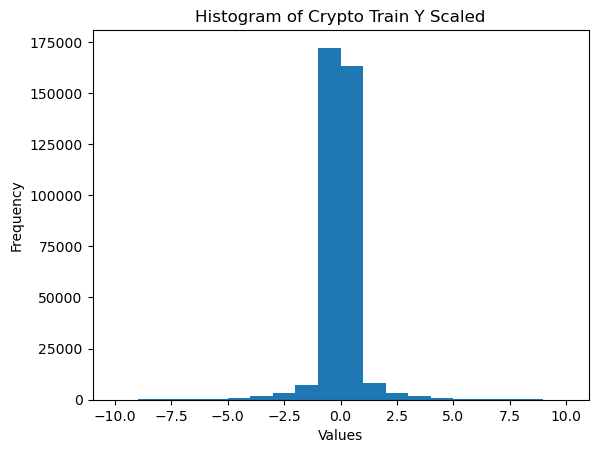

In [83]:
#Histogram of the scaled Y values
plt.hist(crypto_train_Y_scaled, bins=20)
plt.title('Histogram of Crypto Train Y Scaled')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()


In [84]:
#average target value for all currencies in the training
#This is the Baseline MSE values to outperform with our models

average = np.mean(crypto_train_Y_scaled)
print(average)

print(
    'MSE validation baseline model:', np.mean((crypto_val_Y_scaled - average)**2)
)

print(
    'MSE test baseline model:', np.mean((crypto_test_Y_scaled - average)**2)
)

-0.002980660658191303
MSE validation baseline model: 0.9271851216282017
MSE test baseline model: 0.8428365248509003


In [85]:
crypto_train_X_scaled.shape

(365479, 103)

In [95]:
tf.random.set_seed(0)
np.random.seed(0)
x_features = crypto_train_X_scaled.shape[1] #This is for the num_features parameter

full_lin_model = linear_model(num_features=x_features, learning_rate=0.001, optimizer = 'Adam') #most optimal parameters found

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1) #Early Stopping to save time modeling

linear_history = full_lin_model.fit( #fit model and use the validation scaled values to evaluate the val_loss
  x = crypto_train_X_scaled,
  y = crypto_train_Y_scaled,
  epochs=100,
  verbose=1,
    batch_size = 128,
    validation_data=(crypto_val_X_scaled, crypto_val_Y_scaled),
callbacks = [early_stop])

Epoch 1/100
2856/2856 [==============================] - 3s 1ms/step - loss: 699.1459 - val_loss: 12.9828
Epoch 2/100
2856/2856 [==============================] - 3s 986us/step - loss: 13.0707 - val_loss: 3.6457
Epoch 3/100
2856/2856 [==============================] - 3s 971us/step - loss: 2.4480 - val_loss: 1.0403
Epoch 4/100
2856/2856 [==============================] - 3s 973us/step - loss: 0.9030 - val_loss: 0.9392
Epoch 5/100
2856/2856 [==============================] - 3s 976us/step - loss: 0.8630 - val_loss: 0.9295
Epoch 6/100
2856/2856 [==============================] - 3s 974us/step - loss: 0.8590 - val_loss: 0.9309
Epoch 7/100
2856/2856 [==============================] - 3s 969us/step - loss: 0.8584 - val_loss: 0.9291
Epoch 8/100
2856/2856 [==============================] - 3s 973us/step - loss: 0.8585 - val_loss: 0.9282
Epoch 9/100
2856/2856 [==============================] - 3s 1ms/step - loss: 0.8586 - val_loss: 0.9277
Epoch 10/100
2856/2856 [==============================]

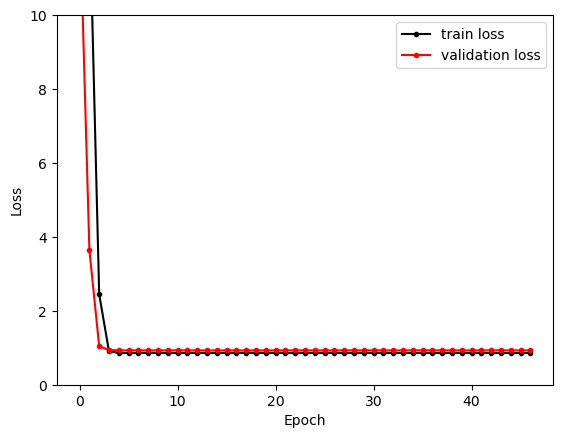

Final train loss: 0.8584688901901245
Final validation loss: 0.9288449883460999
MSE validation baseline model: 0.9271851216282017
MSE test baseline model: 0.8428365248509003


In [96]:
#plot the Train and Validation Loss and compare to the baselines
plot_loss(full_lin_model, linear_history)

print(
    'MSE validation baseline model:', np.mean((crypto_val_Y_scaled - average)**2)
)

print(
    'MSE test baseline model:', np.mean((crypto_test_Y_scaled - average)**2)
)

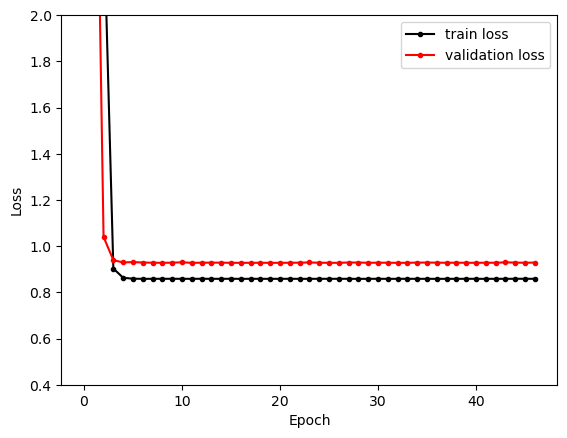

Final train loss: 0.8584688901901245
Final validation loss: 0.9288449883460999


In [97]:
# Closer Look
plot_zoom_loss(full_lin_model, linear_history)

# Linear Regression Hyperparameters

In [100]:

lin_dict = {'learning_rate': [.1, .01, .001, .001, .001, .001,.001,.001],
            'optimizer': ['adam', 'adam', 'adam', 'SGD', 'adam', 'adam', 'adam','adam'],
            'L2': [0, 0, 0,0, .01, .1, .01,.01],
            'dropout': [0,0,0,0, 0,0, 0.3,.5],
           'train_loss': [55.245,1.023,1.239,1.7901,.9751,0.9125,.857,0.858],
           'val_loss':[12.362,.9785,.9565,1.2070,0.9158,0.9612,0.9297,0.929]}

lin_df = pd.DataFrame.from_dict(lin_dict)


lin_df

,learning_rate,optimizer,L2,dropout,train_loss,val_loss
0,0.1000,adam,0.0000,0.0000,55.2450,12.3620
1,0.0100,adam,0.0000,0.0000,1.0230,0.9785
2,0.0010,adam,0.0000,0.0000,1.2390,0.9565
3,0.0010,SGD,0.0000,0.0000,1.7901,1.2070
4,0.0010,adam,0.0100,0.0000,0.9751,0.9158
5,0.0010,adam,0.1000,0.0000,0.9125,0.9612
6,0.0010,adam,0.0100,0.3000,0.8570,0.9297
7,0.0010,adam,0.0100,0.5000,0.8580,0.9290


Linear Regression showed decent results by beating the baseline a lot. However, adding dropout and a small L2 regularization helped with the results

In [101]:
#Test Set MSE for best set of hyper parameters
lin_test_loss = full_lin_model.evaluate(crypto_test_X_scaled, crypto_test_Y_scaled)
print("Test loss (MSE):", lin_test_loss)

3608/3608 [==============================] - 2s 678us/step - loss: 0.8456
Test loss (MSE): 0.845562219619751


# CNN

In [102]:
crypto_train_X_scaled.shape

(365479, 103)

In [103]:



def build_cnn(input_shape, kernel_size, strides, pool_size, learning_rate, optimizer):
    '''Build a CNN Model
        input_shape - Shape of input Con1D so just (num_features , 1)
        kernel_size - kernel size
        strides - stride length of convolution
        pool_size- number determine max pool size
        learning_rate - learning rate
        optimizer- what optimizer do you want to use?'''
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    model = keras.Sequential()
    
    model.add(layers.Conv1D(64, kernel_size=kernel_size, strides=strides, activation="tanh", input_shape=input_shape))
    
    model.add(layers.MaxPooling1D(pool_size=pool_size))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(32, activation="tanh"))
    
    
    model.add(tf.keras.layers.Dropout(rate=0.7))
    model.add(layers.Dense(1))

    model.compile(
        loss="mean_squared_error",
        optimizer=optimizer(learning_rate=learning_rate),
    )

    return model


In [104]:
#build CNN model
cnn_model = build_cnn(
    input_shape= (crypto_train_X_scaled.shape[1], 1), # input shape of the form (sequence_length, num_features)
    kernel_size=2,
    strides=2,
    pool_size=2,
    learning_rate=.07,
    optimizer=keras.optimizers.Adam,
)

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1) #early stopping to save time

cnn_history = cnn_model.fit( #build model
  x = crypto_train_X_scaled,
  y = crypto_train_Y_scaled,
  epochs=20,
  verbose=1,
    batch_size = 64,
    validation_data=(crypto_val_X_scaled, crypto_val_Y_scaled),
callbacks = [early_stop])

Epoch 1/20
5711/5711 [==============================] - 16s 3ms/step - loss: 1.0473 - val_loss: 0.9861
Epoch 2/20
5711/5711 [==============================] - 14s 2ms/step - loss: 1.0395 - val_loss: 0.9770
Epoch 3/20
5711/5711 [==============================] - 14s 2ms/step - loss: 1.0365 - val_loss: 1.0659
Epoch 4/20
5711/5711 [==============================] - 14s 2ms/step - loss: 1.0359 - val_loss: 1.0733
Epoch 5/20
5711/5711 [==============================] - 15s 3ms/step - loss: 1.0396 - val_loss: 1.2401
Epoch 6/20
5711/5711 [==============================] - 15s 3ms/step - loss: 1.0375 - val_loss: 0.9392
Epoch 7/20
5711/5711 [==============================] - 15s 3ms/step - loss: 1.0368 - val_loss: 1.0249
Epoch 8/20
5711/5711 [==============================] - 15s 3ms/step - loss: 1.0330 - val_loss: 0.9332
Epoch 9/20
5711/5711 [==============================] - 15s 3ms/step - loss: 1.0364 - val_loss: 0.9443
Epoch 10/20
5711/5711 [==============================] - 15s 3ms/step - l

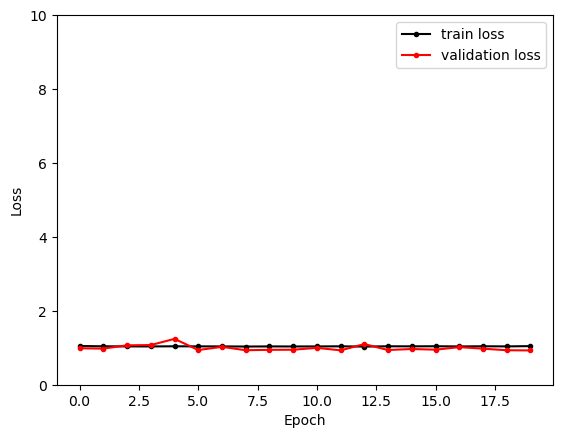

Final train loss: 1.0444939136505127
Final validation loss: 0.9279211759567261
MSE validation baseline model: 0.9271851216282017
MSE test baseline model: 0.8428365248509003


In [105]:
#plot the loss graph

plot_loss(cnn_model, cnn_history)

#average target value for all currencies in the training

average = np.mean(crypto_train_Y_scaled)




print(
    'MSE validation baseline model:', np.mean((crypto_val_Y_scaled - average)**2)
)

print(
    'MSE test baseline model:', np.mean((crypto_test_Y_scaled - average)**2)
)


# CNN Hyperparameters

In [124]:

cnn_dict = {'learning_rate': [.1, .01, .001, .001, .001, .001,.001,.001,.07,.001,.001],
            'optimizer': ['adam', 'adam', 'adam', 'SGD', 'adam', 'adam', 'adam','adam','adam','adam','adam'],
            'kernel_size': [2, 2, 2,2, 1, 2, 2,2,2,2,2],
            'strides': [2,2,2,2,2,2,2,2,2,1,2],
            'pool_size': [2,2,2,2,2,2,2,2,2,2,3],
            'activation': ['relu','relu','relu','relu','relu','tanh', 'tanh','tanh','tanh','tanh','tanh'],
            'dropout': [0,0,0,0, 0,0, 0.5,.7,.7, .7,.7],
           'train_loss': [1.754,1.778,1.239,12.881,1.682,0.961,.944,0.943,1.044, 3.125,5.152],
           'val_loss':[1.166,1.221,.9565,17.360,0.9852,0.911,0.933,0.931,.9279, 1.961, .989]}

cnn_df = pd.DataFrame.from_dict(cnn_dict)


cnn_df

,learning_rate,optimizer,kernel_size,strides,pool_size,activation,dropout,train_loss,val_loss
0,0.1000,adam,2,2,2,relu,0.0000,1.7540,1.1660
1,0.0100,adam,2,2,2,relu,0.0000,1.7780,1.2210
2,0.0010,adam,2,2,2,relu,0.0000,1.2390,0.9565
3,0.0010,SGD,2,2,2,relu,0.0000,12.8810,17.3600
4,0.0010,adam,1,2,2,relu,0.0000,1.6820,0.9852
5,0.0010,adam,2,2,2,tanh,0.0000,0.9610,0.9110
6,0.0010,adam,2,2,2,tanh,0.5000,0.9440,0.9330
7,0.0010,adam,2,2,2,tanh,0.7000,0.9430,0.9310
8,0.0700,adam,2,2,2,tanh,0.7000,1.0440,0.9279
9,0.0010,adam,2,1,2,tanh,0.7000,3.1250,1.9610


In [106]:
test_loss = cnn_model.evaluate(crypto_test_X_scaled, crypto_test_Y_scaled)
print("Test loss (MSE):", test_loss)

3608/3608 [==============================] - 4s 1ms/step - loss: 0.8437
Test loss (MSE): 0.843657374382019


The CNN had major issues with overfitting with the training always being higher than the validation, no matter what the hyperparameters were, so therefore maybe CNN is not the best option for this type of time series problem